## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [167]:
# USING SOME CODE FROM LAST ASSIGNMENT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import seaborn as sns
from scipy.stats import chisquare
import scipy.stats as stats


import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [168]:
# Dropping in the same code as before, and just extending it
# for confidence intervals, maybe some insight into how
# p values relate to ci's

names = ['class_name',
         'handicapped-infants',
         'water-project-cost-sharing',
         'adoption-of-the-budget-resolution',
         'physician-fee-freeze',
         'el-salvador-aid',
         'religious-groups-in-schools',
         'anti-satellite-test-ban',
         'aid-to-nicaraguan-contras',
         'mx-missile',
         'immigration',
         'synfuels-corporation-cutback',
         'education-spending',
         'superfund-right-to-sue',
         'crime',
         'duty-free-exports',
         'export-administration-act-south-africa']


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header=None, 
                 names=names,
                 na_values='?')

# Replace strings with numbers so we can use them for
# math later, this time we must deal with nans differ-
# ently on down esle numpy will generate nans fo cis

df = df.replace({'n':0,
                 'y':1})


# Subset republican and democrat
rep = df[df['class_name'] == 'republican']
rep = rep.drop('class_name', axis = 1)

dem = df[df['class_name'] == 'democrat']
dem = dem.drop('class_name', axis = 1)

issues = names[1:]



In [169]:
# Function to generate ci, 


def gen_ci(data, confidence_level):
    # Data
    d = 1.0 * np.array(data)
    # Mean using nanmean because of nans
    m = np.nanmean(data)
    # Length
    l = len(data)
    # Standard Error, must use nan_policy='omit'
    se = stats.sem(d, nan_policy='omit')
    # ppf
    ppf = stats.t.ppf((1 + confidence_level) / 2.0, l - 1)
    # Margin of Error
    moe = ppf * se
    # Interval
    i = se * ppf
    # Low
    low = m - i
    high = m +i
    # Result
    
    return m, se, moe, i, low, high



replst = []
demlst = []

for issue in issues:
    
    #republican
    rm, rse, rmoe, ri, rilow, rihigh = gen_ci(rep[issue], 0.95)
    replst.append([issue, rm, rse, rmoe, ri, rilow, rihigh])
    # Democratic
    dm, dse, dmoe, di, dilow, dihigh = gen_ci(dem[issue], 0.95)
    demlst.append([issue, dm, dse, dmoe, di, dilow, dihigh])
    
    
dfrep = pd.DataFrame(replst, columns =['issue',  
                                     'mean',
                                     'standard_error',
                                     'margin_of_error',
                                     'interval',
                                     'low',
                                     'high'  
                                       
                                     ]) 

dfdem = pd.DataFrame(demlst, columns =['issue',  
                                     'mean',
                                     'standard_error',
                                     'margin_of_error',
                                     'interval',
                                     'low',
                                     'high'  
                                     ]) 


In [170]:

dfdem.head()

,issue,mean,standard_error,margin_of_error,interval,low,high
0,handicapped-infants,0.604651,0.030498,0.060049,0.060049,0.544602,0.664700
1,water-project-cost-sharing,0.502092,0.032410,0.063813,0.063813,0.438279,0.565905
2,adoption-of-the-budget-resolution,0.888462,0.019561,0.038513,0.038513,0.849948,0.926975
3,physician-fee-freeze,0.054054,0.014078,0.027718,0.027718,0.026336,0.081772
4,el-salvador-aid,0.215686,0.025807,0.050812,0.050812,0.164874,0.266498


In [171]:
dfrep.head()

,issue,mean,standard_error,margin_of_error,interval,low,high
0,handicapped-infants,0.187879,0.030502,0.060219,0.060219,0.127660,0.248098
1,water-project-cost-sharing,0.506757,0.041236,0.081410,0.081410,0.425347,0.588167
2,adoption-of-the-budget-resolution,0.134146,0.026694,0.052702,0.052702,0.081445,0.186848
3,physician-fee-freeze,0.987879,0.008545,0.016870,0.016870,0.971009,1.004749
4,el-salvador-aid,0.951515,0.016772,0.033113,0.033113,0.918402,0.984628


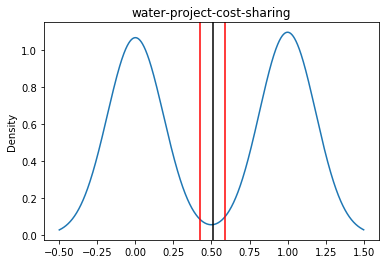

In [172]:
# Make a plot, sorry pressed for time. Its ugly and quick. 

rep['water-project-cost-sharing'].plot.density()
plt.title('water-project-cost-sharing')

m, se, moe, i, low, high = gen_ci(rep['water-project-cost-sharing'], 0.95)

plt.axvline(low, color='red')
plt.axvline(m,color='black')
plt.axvline(high,color='red')

plt.show()
    

In [173]:
# INTERPRETATION
# 95% confidence interval and a p-value of 0.05.............
# think of the confidence interval as the box that contains values that are 
# aligned with the data. If the null value is contained in that box (CI), 
# then we fail to reject it. In other words, the p-value must be greater than 0.05 
# (not statistically significant) if the null value is within the box 
#  However, if the 95% CI excludes the null value (not in the box), then the null 
# hypothesis has been rejected, and the p-value must be < 0.05.


In [174]:
# Chi squared (test for dependance/independance)
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [175]:
# using the MPG dataset from uci
names = ['mpg',
         'cylinders',
         'displacement',
         'horsepower',
         'weight',
         'acceleration',
         'model_year',
         'origin',
         'car_name']

dfmpg = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', 
                    header=None,
                    names=names,
                    delim_whitespace=True)

# Dont need these columns
dfmpg = dfmpg.drop(['car_name', 'origin'], axis = 1)

# Need to drop na cause I had to bin
dfmpg = dfmpg.dropna()
dfmpg = dfmpg.apply(pd.to_numeric, errors='coerce')
dfmpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [176]:
dfmpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82
397,31.0,4,119.0,82.0,2720.0,19.4,82


In [180]:
# BINNING THIS STUPID STUFF
# I AM JUST DIVIDING THEM ALL UP INTO
# 8 EQUAL PARTS THE ONES THAT I NEED

columns = ['mpg',
           'displacement',
           'horsepower',
           'weight',
           'acceleration']

for c in columns:
    dfmpg[c+'_cats'] = pd.qcut(dfmpg[c],
                       q=8,
                       labels=['lowest', 'lower', 'low', 'med-low', 'med', 'med-high', 'high', 'very-high'])


dfmpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,displacement_cats,horsepower_cats,weight_cats,acceleration_cats,mpg_cats
0,18.0,8,307.0,130.0,3504.0,12.0,70,high,high,med-high,lowest,low
1,15.0,8,350.0,165.0,3693.0,11.5,70,high,very-high,high,lowest,lower
2,18.0,8,318.0,150.0,3436.0,11.0,70,high,high,med-high,lowest,low
3,16.0,8,304.0,150.0,3433.0,12.0,70,high,high,med-high,lowest,lower
4,17.0,8,302.0,140.0,3449.0,10.5,70,high,high,med-high,lowest,lower


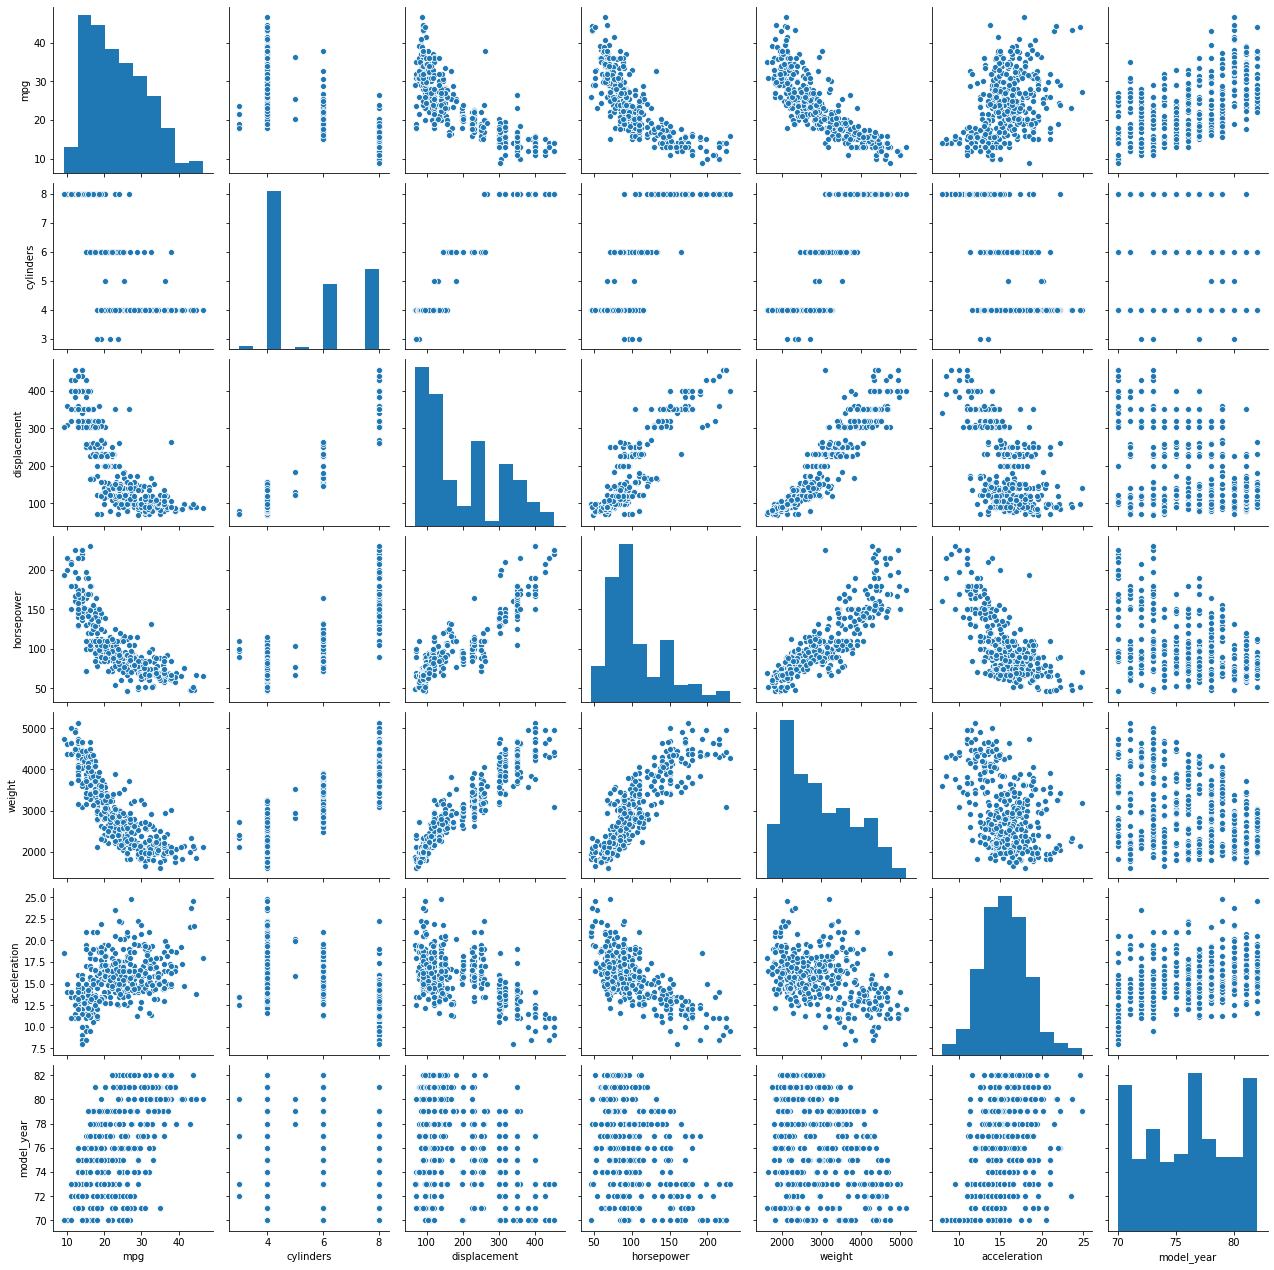

In [181]:
# Take a quick look with pairplot to see correlation
sns.pairplot(dfmpg)

In [188]:
# getting the binned columns, and one hat I know will reject

catagories = ['displacement_cats',
              'horsepower_cats',
              'weight_cats',
              'acceleration_cats', 
              'mpg_cats',
              'cylinders',
              'model_year']
tmp = []
for c in catagories:
    
    # Basing everyhting on mpg
    contingency = pd.crosstab(dfmpg['mpg_cats'], 
                              dfmpg[c] )
    
    # Do our Chi squared on the contingency table
    stat, p, dof, expected = chi2_contingency(contingency)
    
    # How sure do we wanna be?
    prob = 0.95
    
    # Critical value
    critical = chi2.ppf(prob, dof)
    
    # Figure out if we should reject, or fail to reject the null
    conclusion = ''
    if abs(stat) >= critical:
        conclusion = 'Dependent(reject H0)'
    else:
        conclusion = 'Independent(fail to reject H0)'
    
    # Slap that stuff into a list
    r = ['mgp-'+c, abs(stat), p, dof, conclusion]
    
    # Append the slapped stuff into another list
    tmp.append(r)
    
mpgrel = pd.DataFrame(tmp, columns =['relationship',  
                                     'stats',
                                     'p_value',
                                     'dof',
                                     'conclusion'])     

In [189]:
mpgrel.head(10)

,relationship,stats,p_value,dof,conclusion
0,mgp-displacement_cats,528.202356,1.425208e-81,49,Dependent(reject H0)
1,mgp-horsepower_cats,541.757411,2.937590e-84,49,Dependent(reject H0)
2,mgp-weight_cats,599.515372,9.036053e-96,49,Dependent(reject H0)
3,mgp-acceleration_cats,167.684561,6.744825e-15,49,Dependent(reject H0)
4,mgp-mpg_cats,2786.000000,0.000000e+00,49,Dependent(reject H0)
5,mgp-cylinders,450.016274,1.230908e-77,28,Dependent(reject H0)
6,mgp-model_year,281.815470,3.420194e-23,84,Dependent(reject H0)


In [190]:
# Strange though, that is not what I see in the pair plot
# Lets do it with the pvalue and see if things are different
# interpret p-value
alpha = 1.0 - 0.95
    
mpgrel['conclusion_p'] = ['Dependent (reject H0)' if x <= alpha else 'Independent (fail to reject H0)' for x in mpgrel['p_value']]

In [192]:
mpgrel.head(6)

,relationship,stats,p_value,dof,conclusion,conclusion_p
0,mgp-displacement_cats,528.202356,1.425208e-81,49,Dependent(reject H0),Dependent (reject H0)
1,mgp-horsepower_cats,541.757411,2.937590e-84,49,Dependent(reject H0),Dependent (reject H0)
2,mgp-weight_cats,599.515372,9.036053e-96,49,Dependent(reject H0),Dependent (reject H0)
3,mgp-acceleration_cats,167.684561,6.744825e-15,49,Dependent(reject H0),Dependent (reject H0)
4,mgp-mpg_cats,2786.000000,0.000000e+00,49,Dependent(reject H0),Dependent (reject H0)
5,mgp-cylinders,450.016274,1.230908e-77,28,Dependent(reject H0),Dependent (reject H0)


In [ ]:
# I JUST REALIZED SOMETHING: I AM NOT USING
# CATAGORICAL STINKING VARIALES. CAME THIS
# FAR, WILL JUST BIN THESE STUPID THINGS AND
# HOPE FOR THE BEST, I VAUGELY REMEMBER BINNIG
# THEM BEFORE, NOT THAT I DONE SCREWED IT UP.
# GOING BACK UP TO BIN THESE. So what you see 
# above is not what it was. Tried figuring out
# What was wrong for way to long. 

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)